In [37]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
file_path = "/Users/yongho.kim/tmp/aps/20230301_2000kz_ioc_9consumers.txt"
file_path = "/Users/yongho.kim/tmp/aps/20230301_1000hz_ioc_3of3consumers_groundtruth105894.txt"
file_path = "/Users/yongho.kim/tmp/aps/20230301_2kz_ioc_3x9consumers.txt"

In [83]:
def load(file_path):
    collector = []
    consumers = []
    with open(file_path, "r") as file:
        for line in file:
            j = json.loads(line.replace("\'", "\""))
            if "consumerId" in j:
                consumers.append(j)
            elif "collectorId" in j:
                collector.append(j)
            else:
                print(f'unknown type: {j}')
    return pd.json_normalize(collector), pd.json_normalize(consumers)

def print_stat(collector, consumersgroup):
    print("collector")
    print(f'\t collected: {collector["collectorStats.nCollected"].max()}')
    print(f'\t rejected: {collector["collectorStats.nRejected"].max()}')

    print(f'consumers: {len(consumersgroup)}')
    print(f'\t total processed: {sum(consumersgroup["userStats.nFramesProcessed"].max())}')
    print(f'\t total overruns: {sum(consumersgroup["monitorStats.nOverruns"].max())}')

In [75]:
collector, consumers = load(file_path=file_path)

In [21]:
collector

,collectorId,objectId,objectTime,objectTimestamp.secondsPastEpoch,objectTimestamp.nanoseconds,objectTimestamp.userTag,collectorStats.nCollected,collectorStats.collectedRate,collectorStats.nRejected,collectorStats.rejectedRate,...,producerStats_9.producerId,producerStats_9.channel,producerStats_9.monitorStats.nReceived,producerStats_9.monitorStats.receivedRate,producerStats_9.monitorStats.nOverruns,producerStats_9.monitorStats.overrunRate,producerStats_9.queueStats.nReceived,producerStats_9.queueStats.nRejected,producerStats_9.queueStats.nDelivered,producerStats_9.queueStats.nQueued
0,1,0,0.000000e+00,0,0,0,0,0.0000,0,0.000000,...,0,,0,0.000000,0,0.0,0,0,0,0
1,1,1,1.677689e+09,1677688914,415170669,0,0,0.0000,0,0.000000,...,9,processor:9:output,0,0.000000,0,0.0,0,0,0,0
2,1,2,1.677689e+09,1677688919,420930147,0,0,0.0000,0,0.000000,...,9,processor:9:output,0,0.000000,0,0.0,0,0,0,0
3,1,3,1.677689e+09,1677688924,427065610,0,0,0.0000,0,0.000000,...,9,processor:9:output,0,0.000000,0,0.0,0,0,0,0
4,1,4,1.677689e+09,1677688929,432908058,0,0,0.0000,0,0.000000,...,9,processor:9:output,0,0.000000,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,1,325,1.677691e+09,1677690536,432638883,0,52828,58.6677,44449,49.362471,...,9,processor:9:output,11345,12.599096,0,0.0,11345,0,11345,0
326,1,326,1.677691e+09,1677690541,438950538,0,52828,58.6677,44449,49.362471,...,9,processor:9:output,11345,12.599096,0,0.0,11345,0,11345,0
327,1,327,1.677691e+09,1677690546,445262193,0,52828,58.6677,44449,49.362471,...,9,processor:9:output,11345,12.599096,0,0.0,11345,0,11345,0
328,1,328,1.677691e+09,1677690551,450626850,0,52828,58.6677,44449,49.362471,...,9,processor:9:output,11345,12.599096,0,0.0,11345,0,11345,0


In [78]:
consumers

,consumerId,inputChannel,objectId,objectTime,objectTimestamp.secondsPastEpoch,objectTimestamp.nanoseconds,objectTimestamp.userTag,monitorStats.nReceived,monitorStats.receivedRate,monitorStats.nOverruns,...,userStats.memUsed,userStats.cpuUtil,userStats.netTxUsed,userStats.netRxUsed,userStats.nFramesProcessed,userStats.nBatchesProcessed,userStats.nFramesQueued,userStats.inferTime,userStats.inferRate,userStats.frameProcessingRate
0,1,,0,0.000000e+00,0,0,0,0,0.000000,0,...,0.000000,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
1,2,,0,0.000000e+00,0,0,0,0,0.000000,0,...,0.000000,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
2,3,,0,0.000000e+00,0,0,0,0,0.000000,0,...,0.000000,0.0,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
3,2,pvapy:waggle1,1,1.677724e+09,1677723760,738391399,0,0,0.000000,0,...,1.443480,7.7,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
4,1,pvapy:waggle1,1,1.677724e+09,1677723760,821901321,0,0,0.000000,0,...,1.443606,7.8,0.000000,0.000000,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,5,pvapy:waggle1,101,1.677724e+09,1677724265,454199790,0,17577,73.051031,0,...,4.524184,2.8,0.000002,0.000014,17576,2197,0,144.090032,15.247411,121.979291
2642,4,pvapy:waggle1,101,1.677724e+09,1677724265,481917381,0,17577,73.043436,0,...,4.521578,2.8,0.000002,0.000014,17576,2197,0,148.104471,14.834123,118.672987
2643,19,pvapy:waggle1,95,1.677724e+09,1677724269,503610134,0,17577,73.043314,0,...,4.560671,3.7,0.000006,0.000016,17576,2197,0,136.025321,16.151405,129.211237
2644,21,pvapy:waggle1,95,1.677724e+09,1677724269,517201423,0,17577,73.042533,0,...,4.547986,3.7,0.000006,0.000016,17576,2197,0,141.356979,15.542211,124.337688


<AxesSubplot: xlabel='objectId'>

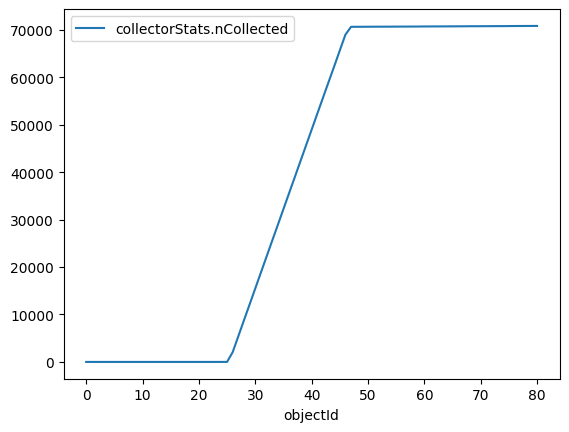

In [44]:
collector.plot(x="objectId", y="collectorStats.nCollected")

In [77]:
cg = consumers.groupby("consumerId")

consumerId
1     AxesSubplot(0.125,0.11;0.775x0.77)
2     AxesSubplot(0.125,0.11;0.775x0.77)
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
11    AxesSubplot(0.125,0.11;0.775x0.77)
12    AxesSubplot(0.125,0.11;0.775x0.77)
13    AxesSubplot(0.125,0.11;0.775x0.77)
14    AxesSubplot(0.125,0.11;0.775x0.77)
15    AxesSubplot(0.125,0.11;0.775x0.77)
16    AxesSubplot(0.125,0.11;0.775x0.77)
17    AxesSubplot(0.125,0.11;0.775x0.77)
18    AxesSubplot(0.125,0.11;0.775x0.77)
19    AxesSubplot(0.125,0.11;0.775x0.77)
20    AxesSubplot(0.125,0.11;0.775x0.77)
21    AxesSubplot(0.125,0.11;0.775x0.77)
22    AxesSubplot(0.125,0.11;0.775x0.77)
23    AxesSubplot(0.125,0.11;0.775x0.77)
24    AxesSubplot(0.125,0.11;0.775x0.77)
25   

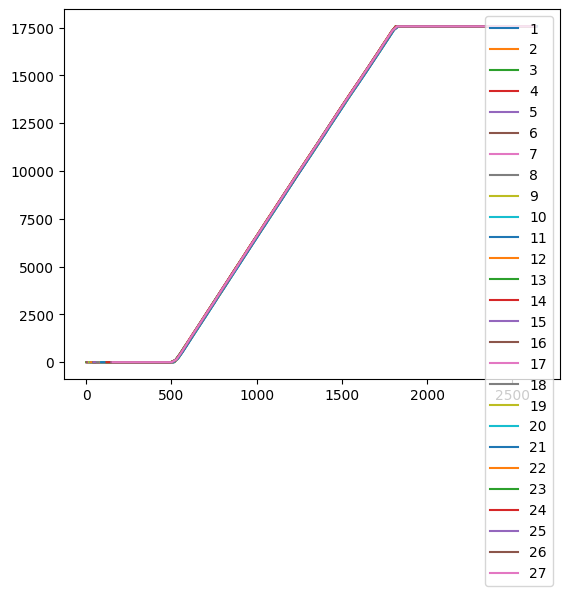

In [79]:
cg["userStats.nFramesProcessed"].plot(legend=True)

consumerId
1     AxesSubplot(0.125,0.11;0.775x0.77)
2     AxesSubplot(0.125,0.11;0.775x0.77)
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
11    AxesSubplot(0.125,0.11;0.775x0.77)
12    AxesSubplot(0.125,0.11;0.775x0.77)
13    AxesSubplot(0.125,0.11;0.775x0.77)
14    AxesSubplot(0.125,0.11;0.775x0.77)
15    AxesSubplot(0.125,0.11;0.775x0.77)
16    AxesSubplot(0.125,0.11;0.775x0.77)
17    AxesSubplot(0.125,0.11;0.775x0.77)
18    AxesSubplot(0.125,0.11;0.775x0.77)
19    AxesSubplot(0.125,0.11;0.775x0.77)
20    AxesSubplot(0.125,0.11;0.775x0.77)
21    AxesSubplot(0.125,0.11;0.775x0.77)
22    AxesSubplot(0.125,0.11;0.775x0.77)
23    AxesSubplot(0.125,0.11;0.775x0.77)
24    AxesSubplot(0.125,0.11;0.775x0.77)
25   

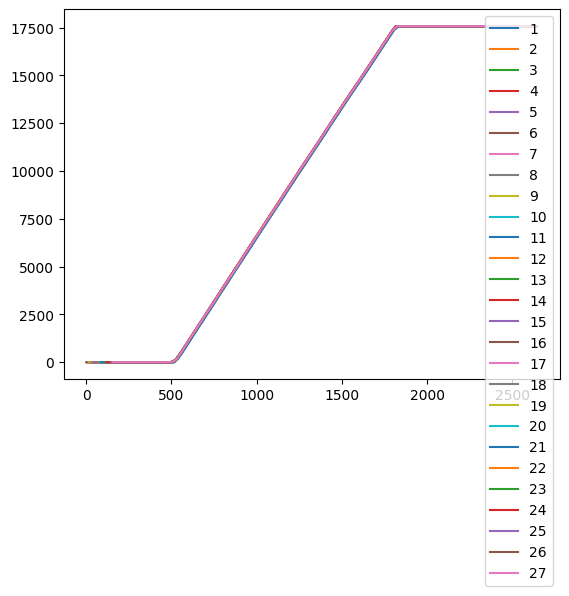

In [85]:
cg["monitorStats.nReceived"].plot(legend=True)

consumerId
1     AxesSubplot(0.125,0.11;0.775x0.77)
2     AxesSubplot(0.125,0.11;0.775x0.77)
3     AxesSubplot(0.125,0.11;0.775x0.77)
4     AxesSubplot(0.125,0.11;0.775x0.77)
5     AxesSubplot(0.125,0.11;0.775x0.77)
6     AxesSubplot(0.125,0.11;0.775x0.77)
7     AxesSubplot(0.125,0.11;0.775x0.77)
8     AxesSubplot(0.125,0.11;0.775x0.77)
9     AxesSubplot(0.125,0.11;0.775x0.77)
10    AxesSubplot(0.125,0.11;0.775x0.77)
11    AxesSubplot(0.125,0.11;0.775x0.77)
12    AxesSubplot(0.125,0.11;0.775x0.77)
13    AxesSubplot(0.125,0.11;0.775x0.77)
14    AxesSubplot(0.125,0.11;0.775x0.77)
15    AxesSubplot(0.125,0.11;0.775x0.77)
16    AxesSubplot(0.125,0.11;0.775x0.77)
17    AxesSubplot(0.125,0.11;0.775x0.77)
18    AxesSubplot(0.125,0.11;0.775x0.77)
19    AxesSubplot(0.125,0.11;0.775x0.77)
20    AxesSubplot(0.125,0.11;0.775x0.77)
21    AxesSubplot(0.125,0.11;0.775x0.77)
22    AxesSubplot(0.125,0.11;0.775x0.77)
23    AxesSubplot(0.125,0.11;0.775x0.77)
24    AxesSubplot(0.125,0.11;0.775x0.77)
25   

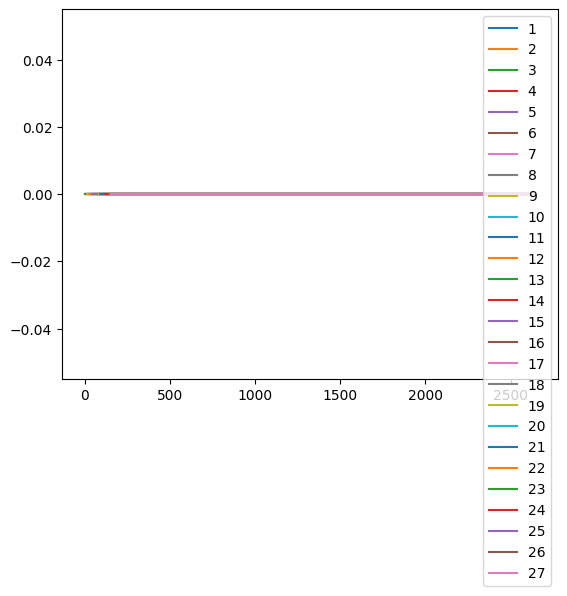

In [80]:

cg["monitorStats.nOverruns"].plot(legend=True)

In [84]:
print_stat(collector, cg)

collector
	 collected: 456336
	 rejected: 0
consumers: 27
	 total processed: 474544
	 total overruns: 0
